# Data Visualization with Python

## Univariate Data Visualization

To understand the functions and feature of the data visualization libraries, let’s us the [`mpg`](https://github.com/mwaskom/seaborn-data/blob/master/mpg.csv) dataset, which is a Seaborn built-in dataset containing fuel consumption observations of a set of cars. 

In [1]:
# importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#magic function for diplaying plot in the notebook
%matplotlib inline 

`pyplot` is matplotlib's interface to the its plotting functions and features. 

In [2]:
# Load the example mpg dataset
df = sns.load_dataset("mpg")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


From the above summary, the dataset consists of 9 variables and *398* records or observations.   
Non of the variables, except *horsepower*, seems to have missing data.

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Univariate visualization
Let's start visualizing  single variables (numerical or categorical). 

### Distribution of numerical variables

A `histogram` is one of the univariate plots used for exploring quantitive data. 

Text(0, 0.5, 'number of cars')

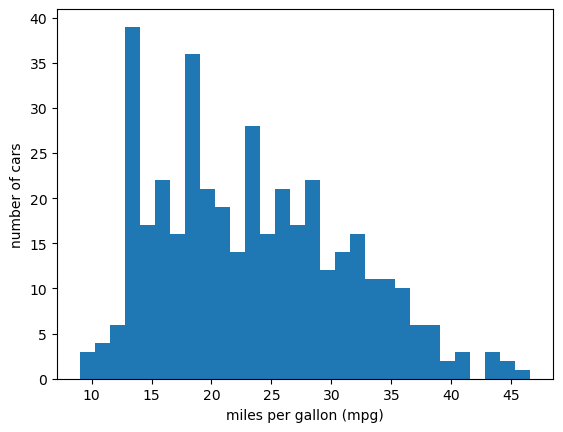

In [9]:
# # plotting the 'mpg' distriubtion using Matplotlib
plt.hist(df['mpg'], bins = 30, align='mid')
# add x/y labels
plt.xlabel("miles per gallon (mpg)")
plt.ylabel("number of cars")

the `hist()` has a range of parameters including the `bin`, `align`, and `histtype`  which, respectively, indicate the number of bins/bars, their alignment, and the histogram type. You can find the the full list of the `hist()`arguments [here](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html). The *x-axis* of the histogram represents the variable values, while the *y-axis* shows the counts/frequencies of the counts. 

The above plot shows that the mpg variable values are distributed from about 10 to approximately 46 showing a slight right/positive skewedness with multi spikes/modes. In a positive-skewed distribution, the outliers on the rights affect the mean, making it higher than both the mode and median. We can confirm that by viewing the summary stats. 

In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Histograms can also be plotted using `Seaborn's` `histplot` function.

Text(0, 0.5, 'number of cars')

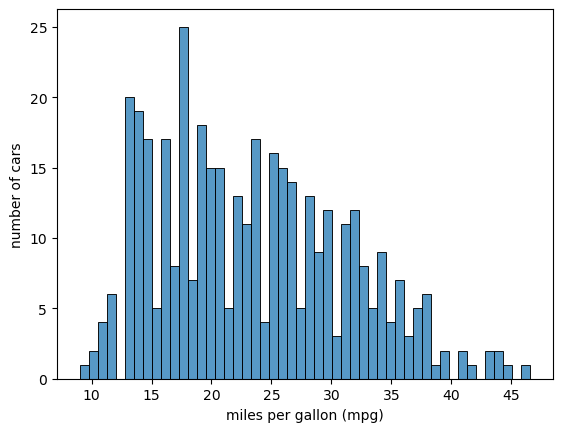

In [7]:
# plotting the 'mpg' distriubtion using Seaborn 
sns.histplot(df['mpg'], bins=50)
# add x/y labels
plt.xlabel("miles per gallon (mpg)") 
plt.ylabel("number of cars")

Notice that we have used `Matplotlib's` *xlabel()* and *ylabel()* functions to add labels to the plot generated with the Seaborn's histplot(). One can also use Seaborn's set_xlabel(), set_ylabel() functions for the same purpose instead of these functions. Please see the full list of features for this function [here](https://seaborn.pydata.org/generated/seaborn.histplot.html).  

In addition to the histogram, one can use a kernel density plot to understand the variable distribution, i.e., estimating the probability density function of a continuous variables. Matplotlib has no function for this kind of plot, but one can easily add `kde` argument to the `histplot()` to achieve this. 

Text(0, 0.5, 'number of cars')

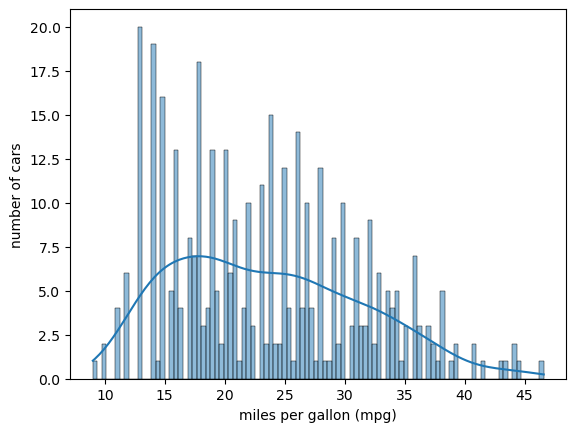

In [8]:
import seaborn as sns
sns.histplot(df['mpg'], bins=100, kde=True)
# add x/y labels
plt.xlabel("miles per gallon (mpg)") 
plt.ylabel("number of cars")

Another useful plotting tool for visualizing quantitative variables and understanding their distributions is the `box plot` (aka `box and whister`). Box plots are also useful in understanding the existence of outliers in the data.  Both `Matplotlib` and `Seaborn` provide functions for creating box plots. 

Text(0.5, 0, 'miles per gallon (mpg)')

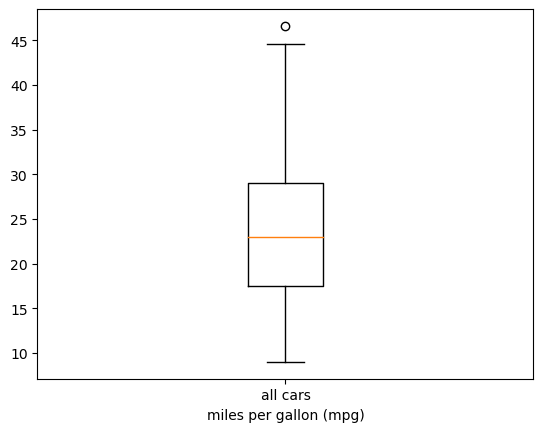

In [9]:
# distbox plot of mpg with Matplotlib
plt.boxplot(df['mpg'])
plt.xticks([1], ['all cars'])
# add x/y labels
plt.xlabel("miles per gallon (mpg)") 

Text(0.5, 0, 'miles per gallon (mpg)')

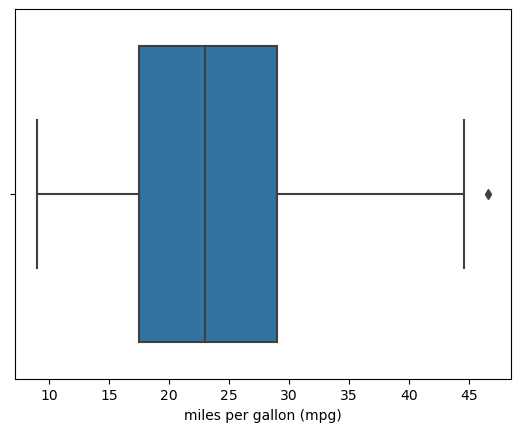

In [10]:
# using the Seaborn boxplot function
sns.boxplot(x='mpg', data=df, orient='h')
plt.xlabel("miles per gallon (mpg)") 

Using Seaborn's boxplot() function, one can view the data without outliers. This can be achieved by turning off a specific paramter called `showfliers`, i.e,, showfliers = False.

Text(0.5, 0, 'miles per gallon (mpg)')

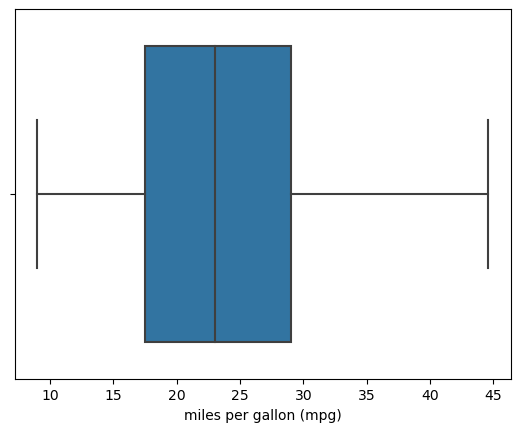

In [11]:
# visualize without outliers
sns.boxplot(x='mpg', data=df, orient='h', showfliers = False)
plt.xlabel("miles per gallon (mpg)") 

excluding the outliers, the maximum car park occupancy is about 45.

The above plots can be used for understanding the distribution of all quantiatve variables, the `mpg` was used as an example. 

**DIY:** Try to apply visualize the distribution of the other quantitative variables in the `mpg` dataset.

### Distribution of categorical variables

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In the above examples, we have looked at numerical variables. Similarly, we can explore the distributions of the categorical variables in the dataset, e.g., origin, name, and cylinders(discrete). The pie and bar/count charts are two very common tools for visualizing this kind of variables.

Text(0.5, 9.444444444444438, 'manufacturing country')

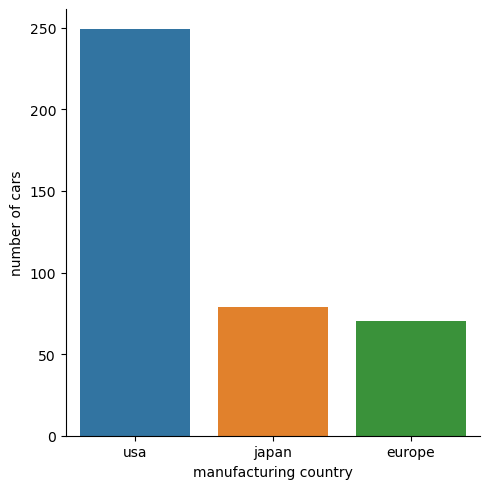

In [13]:
# distribution of cars based on their 'origin'
sns.catplot(x='origin', data=df, kind='count');
# add x/y labels
plt.ylabel("number of cars"); plt.xlabel("manufacturing country")

Text(4.944444444444445, 0.5, 'number of cars')

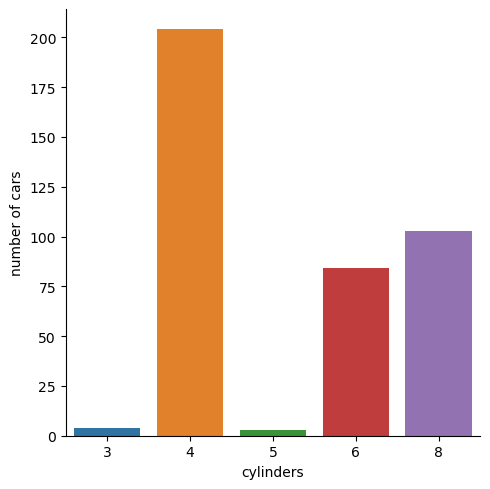

In [14]:
# let's veiw the distribution of the cars in the data based on their cylinders
sns.catplot(x='cylinders', data=df, kind='count');
# add x/y labels
plt.ylabel("number of cars")

One can also use Seaborn's `countplot()` directly for the same purpose of understanding the frequencies of the different categories of the qualitative variable. 

Text(0, 0.5, 'number of cars')

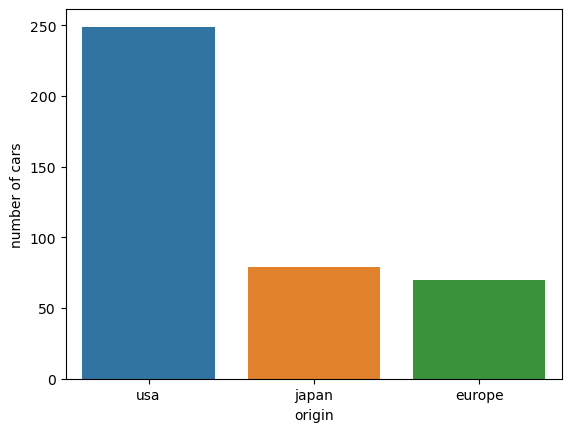

In [15]:
# let's veiw the distribution of the parking a
sns.countplot(data = df, x = 'origin')
# add x/y labels
plt.ylabel("number of cars")

The chart above shows that most cars in this dataset are produced in the United States, approximately 250, with just under 100 cars from each of Japan and Europe 

We can also use matplotlib's `pie()` to look at the distibutiion of cars according to their origin. Seaborn does not have a direct function for creating pie charts. 

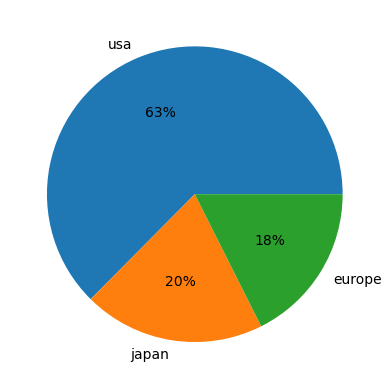

In [12]:
# pie plot of the 'origin' variable
p = df['origin'].value_counts()
plt.pie(x=p, labels=p.index, autopct="%.0f%%");